C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'L=10 2D graph state with different sparsity of flipping the basis')

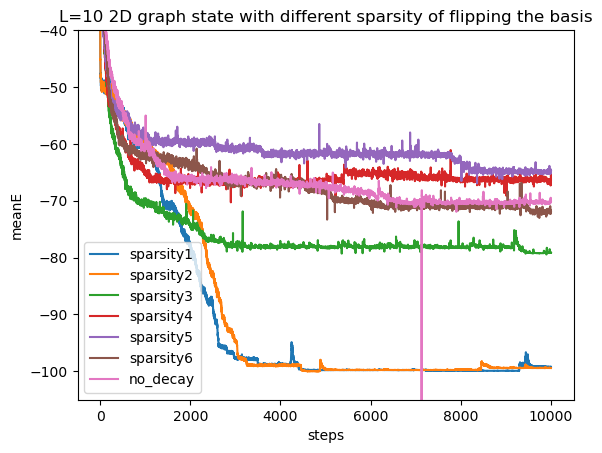

In [1]:
import matplotlib.pyplot as plt
import numpy as np
E1 = np.load("../../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_seed3.npy")
E2 = np.load("../../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity2_seed3.npy")
E3 = np.load("../../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity3_seed3.npy")
E4 = np.load("../../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity4_seed3.npy")
E5 = np.load("../../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity5_seed3.npy")
E6 = np.load("../../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity6_seed3.npy")
En = np.load("../../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity102_seed3.npy")
plt.plot(E1, label="sparsity1")
plt.plot(E2, label="sparsity2")
plt.plot(E3, label="sparsity3")
plt.plot(E4, label="sparsity4")
plt.plot(E5, label="sparsity5")
plt.plot(E6, label="sparsity6")
plt.plot(En, label="no_decay")
plt.legend()
plt.xlabel("steps")
plt.ylabel("meanE")
plt.ylim(-105, -40)
plt.title("L=10 2D graph state with different sparsity of flipping the basis")

(7200,)


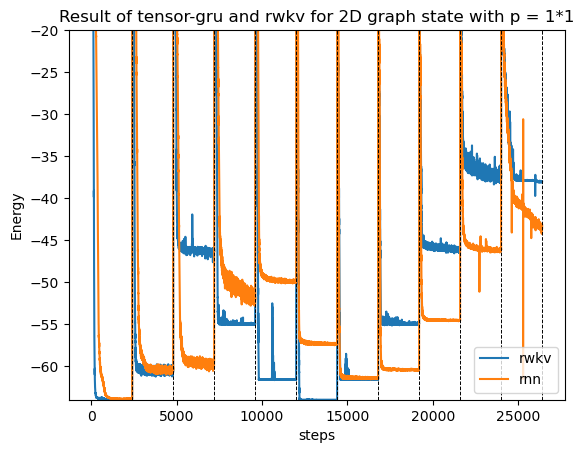

In [3]:
meanE_middle = np.load("../../patched_rnn_rwkv/result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle1.413716694115407_seed3_patch1.npy")
meanE_angle = np.load("../../patched_rnn_rwkv/result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle3.141592653589793_seed3_patch1.npy")
print(meanE_angle.shape)
meanE = np.concatenate((meanE_angle[:2400], meanE_middle, meanE_angle[2400:4800]), axis = 0)
meanE2 = np.load("../../patched_rnn_rwkv/result/meanE_L8_rnn.npy")
plt.plot(np.arange(meanE.shape[0]), meanE, label = "rwkv")
plt.plot(np.arange(meanE.shape[0]), meanE2[:, :2400].ravel(), label = "rnn")
for i in (np.arange(11)+1)*2400:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -20)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of tensor-gru and rwkv for 2D graph state with p = 1*1")
plt.legend()
plt.show()

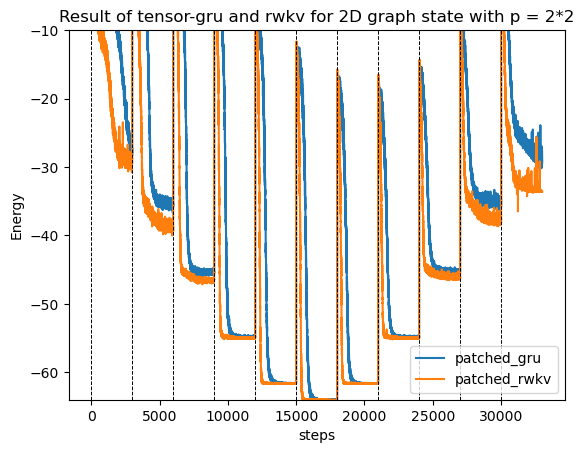

In [6]:
meanE_patch = np.load("../../patched_rnn_rwkv/result/rwkv_meanE_L4_units4_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3_patch4.npy")
meanE_patched_rnn = np.load("../../patched_rnn_rwkv/result/meanE_L4_units32_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3.npy")

indice_1 = np.arange(11)*6000
indice_2 = np.arange(11)*6000+3000
E = []
for i in range(11):
    E.append(meanE_patched_rnn[indice_1[i]:indice_2[i]])
plt.plot(np.array(E).ravel(), label = "patched_gru")
plt.plot(meanE_patch, label = "patched_rwkv")
for i in np.arange(11)*3000:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -10)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of tensor-gru and rwkv for 2D graph state with p = 2*2")
plt.legend()
plt.show()